# 확률적 경사 하강법 (SGD, Stochastic Gradient Descent)
> 머신러닝 모델이 **오차**를 줄이기 위해, **기울기**를 따라 조금씩 **가중치**(파라미터)를 조정하는 방법
- 배치 경사 하강법(GD): 전체 데이터를 사용해서 손실 함수 값(오차)을 줄이는 방향으로 가중치를 업데이트
- 미니배치 경사 하강법: 데이터 일부(mini-batch)를 사용해 업데이트
- <u>**확률적 경사 하강법(SGD)**</u>: 전체 데이터 대신 **랜덤 훈련 샘플 1개**만 사용해 업데이트
    - 계산이 빠르다
    - 노이즈로 인해 지역 최소값 탈출 가능성이 있다

## 키워드 정리

1. 확률적 경사 하강법
    - 손실 함수의 기울기(미분 값)를 통해 가중치를 조금씩 업데이트하며 점진적으로 오차가 0에 가까운 값을 찾아간다
2. **_손실 함수_**
    - 손실 함수 값을 점차적으로 줄여 나가는 것 (Gradient Descent)
    - 가중치와 절편을 **learning_rate(학습률)** 값을 통해서 점진적으로 조정 -> 옵티마이저
3. 에포크
    - 전체 훈련 데이터를 한 번 모두 학습하면 하나의 에포크 (1 에포크, 100 에포크, ...)

## 핵심 패키지와 함수

### 1. scikit-learn

> SGD(Stochastic Gradient Descent)\
Stochastic: 랜덤하게, 확률적으로

GD(Gradient Descent): **손실함수**가 반드시 필요!


1) SGDClassifier: 분류 모델을 만드는 클래스
- 이진분류: binary crossentropy 손실함수 / 활성화 함수(출력함수, Activation Function): sigmoid function
- 다중분류: categorical cressentropy 손실함수 / 활성화 함수(출력함수, Activation Function): softmax function
- `loss='log_loss'`: 로지스틱 손실함수 (binary crossentropy, categorical cressentropy)

2) SGDRegressor: 회기 모델을 만드는 클래스
- mse(Mean Squared Error) -> `loss='squared-error'`

### 2. 점진적인 학습
- partial_fit(...)



In [10]:
import pandas as pd

df = pd.read_csv('https://bit.ly/fish_csv_data')
df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [11]:
fish_data = df[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = df['Species'].to_numpy()

In [12]:
# 훈련 세트, 테스트 세트 나누기

from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, test_size=0.2, random_state=42
)

In [13]:
# 정규화

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [14]:
# 손실함수 설정

from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', n_jobs=-1)  # 로지스틱 손실함수 - binary crossentropy, categorical crossentropy
sc

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,-1


In [26]:
sc.fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,None
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [27]:
print("훈련세트:", sc.score(train_scaled, train_target))
print("테스트세트:", sc.score(test_scaled, test_target))

훈련세트: 0.9212598425196851
테스트세트: 0.90625


테스트세트 점수가 더 크다 -> 과소 적합 상태 (데이터가 적음)

In [28]:
#classes = np.unique(train_target)  # 전체 클래스 목록

sc.partial_fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,None
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [29]:
print("훈련세트:", sc.score(train_scaled, train_target))
print("테스트세트:", sc.score(test_scaled, test_target))

훈련세트: 0.9606299212598425
테스트세트: 0.90625


In [19]:
sc.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype='<U9')

In [20]:
import numpy as np

np.round(sc.predict_proba(test_scaled[:5]), decimals=3)

array([[0.   , 0.   , 0.901, 0.   , 0.099, 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.999, 0.   ],
       [0.   , 0.   , 0.   , 0.986, 0.014, 0.   , 0.   ],
       [0.   , 0.   , 0.229, 0.   , 0.75 , 0.   , 0.021],
       [0.   , 0.   , 0.752, 0.   , 0.248, 0.   , 0.   ]])

In [33]:
sc = SGDClassifier(max_iter=1, tol=None, loss='log_loss')
sc.fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1
,tol,None
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [34]:
train_score = []
test_score = []
train_score.append(sc.score(train_scaled, train_target)) # 훈련 세트 정확도
test_score.append(sc.score(test_scaled, test_target)) # 테스트 세트 정확도

for _ in range(599):
    sc.partial_fit(train_scaled, train_target)
    train_score.append(sc.score(train_scaled, train_target))  # 훈련 세트 정확도
    test_score.append(sc.score(test_scaled, test_target))  # 테스트 세트 정확도

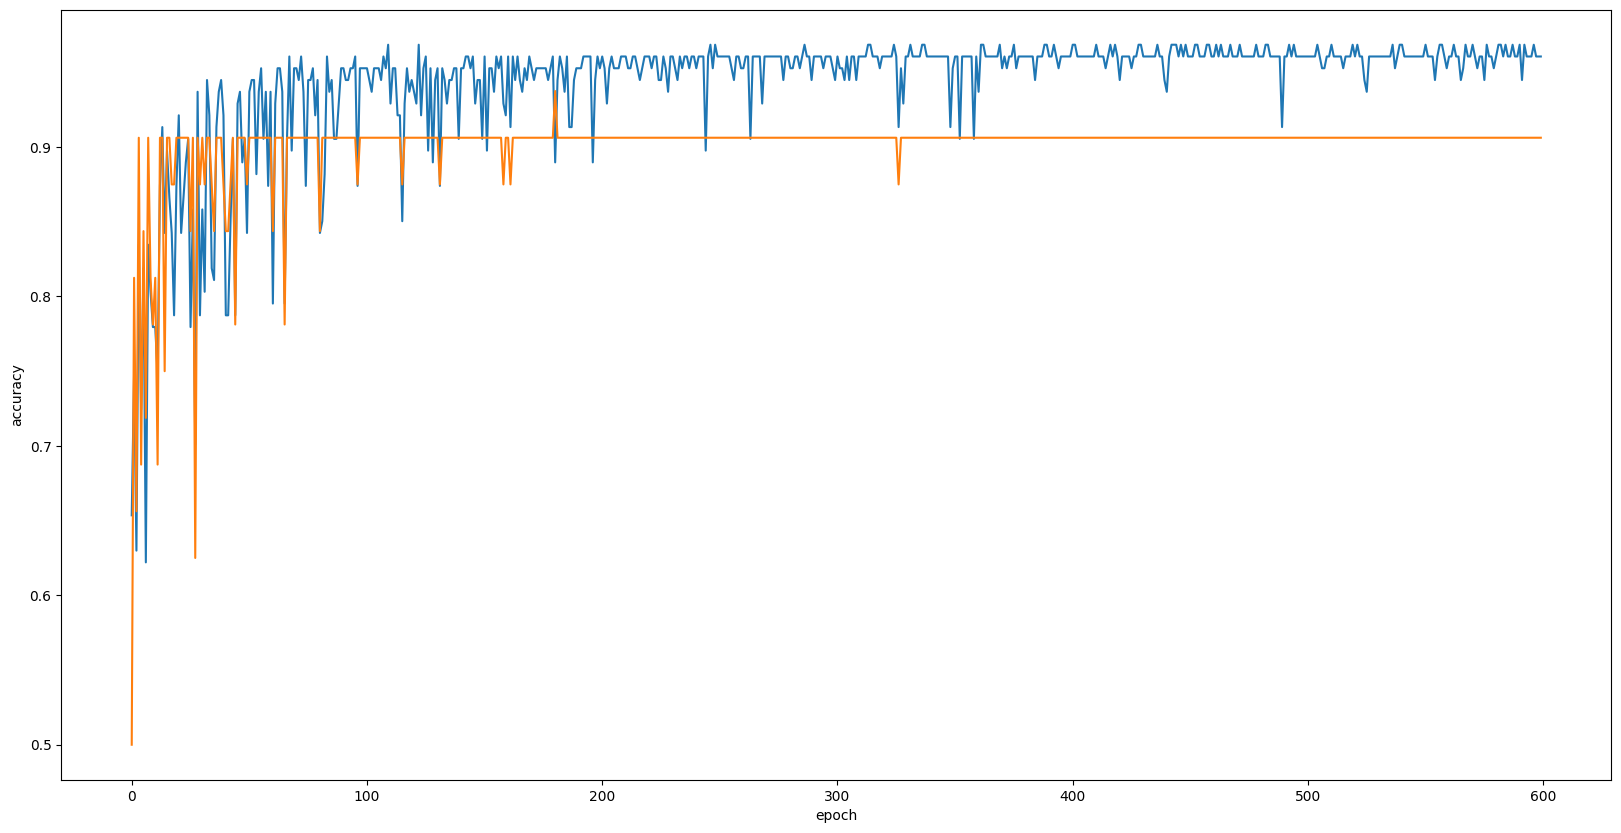

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.show()

In [24]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None)
sc.fit(train_scaled, train_target)

,loss,'log_loss'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,None
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [25]:
print("훈련세트:", sc.score(train_scaled, train_target))
print("테스트세트:", sc.score(test_scaled, test_target))

훈련세트: 0.937007874015748
테스트세트: 0.90625


2) GridSearchCV
- 교차 검증을 통한 하이퍼 파라미터 자동 검색
- 하이퍼 파라미터 조합이 많을수록 연산량이 급증, 오랜 시간이 소요된다.
3) RandomizedSearchCv
- 반복 횟수를 고정
- 하이퍼파라미터 조합을 랜덤하게 값을 선택해서 지정된 반복 횟수만큼 체크

> scipy.stats 패키지 uniform, randint\
randint: 무작위 정수를 발생시키는 함수\
uniform: 무작위 실수를 발생시키는 함수

In [36]:
# GridSearchCV를 통한 최적의 '하이퍼 파라미터'와 최적의 '모델'을 검색

from sklearn.model_selection import GridSearchCV

params = {
    'max_iter': np.arange(50, 1000),
    'tol': np.arange(0.0001, 1, 0.0001),
    'alpha': [0.0001, 0.001, 0.1, 1, 10, 100]
}

sc = SGDClassifier(loss='log_loss')
gs = GridSearchCV(sc, params, n_jobs=-1)

gs.fit(train_scaled, train_target)

c:\Users\admin\Desktop\Daeun-ai\09 Fintech-ML-DL\source\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


KeyboardInterrupt: 

In [37]:
# RandomizedSearchCV

from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

params = {
    'max_iter': randint(50, 1000),
    'tol': uniform(0.001, 1),
    'alpha': uniform(0.001, 100)
}

sc = SGDClassifier(loss='log_loss')
rs = RandomizedSearchCV(sc, params, n_iter=100, n_jobs=-1, random_state=42)

In [38]:
rs.fit(train_scaled, train_target)

c:\Users\admin\Desktop\Daeun-ai\09 Fintech-ML-DL\source\.venv\Lib\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


,estimator,SGDClassifier(loss='log_loss')
,param_distributions,"{'alpha': <scipy.stats....0022CD0ED3D10>, 'max_iter': <scipy.stats....0022CD07BCFB0>, 'tol': <scipy.stats....0022CD0ED2FF0>}"
,n_iter,100
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [39]:
rs.best_params_

{'alpha': np.float64(0.5071583846218687),
 'max_iter': 945,
 'tol': np.float64(0.30636386034439345)}

In [40]:
model = rs.best_estimator_
model

,loss,'log_loss'
,penalty,'l2'
,alpha,np.float64(0.5071583846218687)
,l1_ratio,0.15
,fit_intercept,True
,max_iter,945
,tol,np.float64(0....6386034439345)
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [41]:
print("학습 세트 점수:", model.score(train_scaled, train_target))
print("테스트 세트 점수:", model.score(test_scaled, test_target))

학습 세트 점수: 0.49606299212598426
테스트 세트 점수: 0.53125


In [42]:
# 5-fold 검증 값 cv_results_
np.mean(rs.cv_results_['mean_test_score'])

np.float64(0.32162461538461534)